In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from skbio.diversity import beta_diversity
from skbio.stats.distance import DistanceMatrix
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova
from skbio.stats.distance import bioenv
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import mstats
import matplotlib.pyplot as plt

In [27]:
bc_df = pd.read_csv('../Data/bray-curtis-distance-matrix.tsv', sep = '\t', index_col=0)
bc_df

,L1,L10,L100,L101,L102,L103,L104,L105,L106,L107,...,L9,L90,L91,L93,L94,L95,L96,L97,L98,L99
L1,0.000,0.564,0.240,0.923,0.226,0.462,0.804,0.884,0.738,0.659,...,0.542,0.477,0.843,0.360,0.555,0.438,0.213,0.295,0.243,0.311
L10,0.564,0.000,0.577,0.938,0.571,0.608,0.876,0.674,0.752,0.620,...,0.352,0.442,0.941,0.575,0.649,0.548,0.517,0.580,0.561,0.581
L100,0.240,0.577,0.000,0.943,0.242,0.431,0.939,0.892,0.808,0.658,...,0.614,0.603,0.954,0.381,0.690,0.443,0.259,0.339,0.139,0.357
L101,0.923,0.938,0.943,0.000,0.910,0.893,0.886,0.751,0.819,0.820,...,0.918,0.905,0.798,0.832,0.919,0.789,0.931,0.750,0.950,0.769
L102,0.226,0.571,0.242,0.910,0.000,0.462,0.878,0.913,0.733,0.613,...,0.607,0.555,0.929,0.384,0.641,0.477,0.192,0.366,0.190,0.354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L95,0.438,0.548,0.443,0.789,0.477,0.440,0.900,0.818,0.749,0.613,...,0.577,0.563,0.791,0.409,0.631,0.000,0.445,0.366,0.506,0.365
L96,0.213,0.517,0.259,0.931,0.192,0.481,0.843,0.884,0.727,0.589,...,0.583,0.507,0.926,0.381,0.611,0.445,0.000,0.367,0.186,0.354
L97,0.295,0.580,0.339,0.750,0.366,0.385,0.867,0.687,0.760,0.592,...,0.594,0.530,0.836,0.261,0.598,0.366,0.367,0.000,0.374,0.248
L98,0.243,0.561,0.139,0.950,0.190,0.474,0.939,0.886,0.770,0.674,...,0.586,0.523,0.934,0.368,0.651,0.506,0.186,0.374,0.000,0.374


In [28]:
jac_df = pd.read_csv('../Data/jaccard-distance-matrix.tsv', sep = '\t', index_col=0)
jac_df

,L1,L10,L100,L101,L102,L103,L104,L105,L106,L107,...,L9,L90,L91,L93,L94,L95,L96,L97,L98,L99
L1,0.000000,0.755556,0.823529,0.842105,0.750000,0.794872,0.827160,0.907692,0.717391,0.923077,...,0.682927,0.787234,0.888889,0.859375,0.784314,0.770492,0.744681,0.816667,0.818182,0.794521
L10,0.755556,0.000000,0.750000,0.819277,0.660714,0.760870,0.793103,0.890411,0.591837,0.849057,...,0.666667,0.735849,0.850575,0.847222,0.690909,0.785714,0.673077,0.772727,0.743590,0.790123
L100,0.823529,0.750000,0.000000,0.861111,0.820000,0.677419,0.887500,0.879310,0.707317,0.884211,...,0.829268,0.785714,0.909091,0.864407,0.782609,0.850000,0.847826,0.796296,0.680000,0.828571
L101,0.842105,0.819277,0.861111,0.000000,0.755814,0.746479,0.787611,0.784946,0.797619,0.796875,...,0.769231,0.746835,0.810811,0.838384,0.804598,0.741935,0.797619,0.744444,0.859155,0.686869
L102,0.750000,0.660714,0.820000,0.755814,0.000000,0.730769,0.747253,0.875000,0.677966,0.840708,...,0.719298,0.754098,0.852632,0.850000,0.714286,0.794872,0.721311,0.783784,0.739130,0.726190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L95,0.770492,0.785714,0.850000,0.741935,0.794872,0.793651,0.841121,0.795181,0.760563,0.862903,...,0.779412,0.821918,0.797980,0.813953,0.802632,0.000000,0.794521,0.717949,0.847458,0.768421
L96,0.744681,0.673077,0.847826,0.797619,0.721311,0.823529,0.714286,0.880000,0.690909,0.809524,...,0.711538,0.750000,0.880435,0.868421,0.728814,0.794521,0.000000,0.816901,0.731707,0.753086
L97,0.816667,0.772727,0.796296,0.744444,0.783784,0.714286,0.800000,0.702703,0.746269,0.765766,...,0.765625,0.698413,0.826531,0.743590,0.661538,0.717949,0.816901,0.000000,0.769231,0.670588
L98,0.818182,0.743590,0.680000,0.859155,0.739130,0.709677,0.857143,0.877193,0.631579,0.882979,...,0.729730,0.750000,0.893333,0.821429,0.690476,0.847458,0.731707,0.769231,0.000000,0.859155


In [44]:
mapping_file = pd.read_csv('../Data/mapping_file.csv', index_col=0)
mapping_file = mapping_file[mapping_file.index.isin(bc_df.index)]
mapping_file.loc['L124','Fe'] = np.nan
mapping_file

,genotype,fertility,amf,rep,group,shoot_mass,root_mass,total_mass,ratio_root_to_shoot,root_colonization,...,Fe,Zn,Cu,Mn,Length,AvgDiam,Forks,SurfArea,Origin,Percent
#SampleID,,,,,,,,,,,,,,,,,,,,,
L1,1,P,Y,1,Common (C. dactylon),29.961,4.46,34.421,0.129572,43,...,205.131,40.296,24.655,134.694,162.8464,0.2905,904.0,14.8643,African,100%
L10,1,PPP,Y,2,Common (C. dactylon),26.283,10.16,36.443,0.278792,36,...,291.100,29.000,15.800,66.900,329.7942,0.2978,2620.0,30.8595,African,100%
L100,9,PP,Y,5,Common (C. dactylon),18.142,6.82,24.962,0.273215,21,...,48.811,38.705,9.024,55.564,229.4975,0.3495,1577.0,25.1969,Asian,100%
L101,9,PP,Y,1,Common (C. dactylon),25.649,10.88,36.529,0.297846,26,...,290.800,26.900,16.600,70.900,216.1839,0.3708,1395.0,25.1835,Asian,100%
L102,9,PP,Y,2,Common (C. dactylon),25.664,12.66,38.324,0.330341,39,...,265.700,29.200,20.700,83.900,302.0509,0.2743,1827.0,26.0297,Asian,100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L95,8,PPP,Y,4,Hybrid (C. transvaalensis),22.510,8.57,31.080,0.275740,40,...,44.737,36.247,19.015,46.171,106.4580,0.3194,150.0,10.6812,African,100%
L96,9,P,Y,5,Common (C. dactylon),18.365,8.69,27.055,0.321198,31,...,94.960,28.492,11.294,50.201,357.6942,0.2741,2434.0,30.8066,Asian,100%
L97,9,P,Y,1,Common (C. dactylon),20.526,5.16,25.686,0.200888,36,...,4.080,23.535,14.128,71.663,213.3945,0.3306,1244.0,22.1649,Asian,100%


In [45]:
full_pc_bc = pcoa(bc_df)
full_pc_jac = pcoa(jac_df)

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.2838182356107965 and the largest is 13.162405682239749.
  RuntimeWarning
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more 

In [46]:
plotting_df = mapping_file.copy()
plotting_df = plotting_df[plotting_df.index.isin(bc_df.index)]
plotting_df['PCA1_bc'] = full_pc_bc.samples['PC1'].values
plotting_df['PCA2_bc'] = full_pc_bc.samples['PC2'].values
plotting_df['PCA3_bc'] = full_pc_bc.samples['PC3'].values
plotting_df['PCA1_jac'] = full_pc_jac.samples['PC1'].values
plotting_df['PCA2_jac'] = full_pc_jac.samples['PC2'].values
plotting_df['PCA3_jac'] = full_pc_jac.samples['PC3'].values

<AxesSubplot:xlabel='Genotype', ylabel='Genotype'>

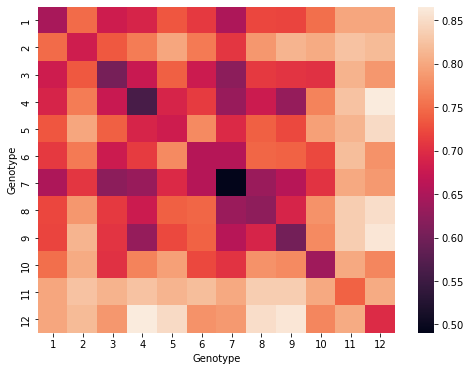

In [47]:
plt.rcParams["figure.figsize"] = (8,6)
tmp_df = bc_df.copy()
tmp_df['Genotype'] = mapping_file['genotype']
tmp_df2 = tmp_df.groupby('Genotype').mean()
tmp_df2 = tmp_df2.T
tmp_df2['Genotype'] = mapping_file['genotype']
tmp_df2 = tmp_df2.groupby('Genotype').mean()
sns.heatmap(tmp_df2)
# plt.savefig('../Figures/bc_heatmap.jpg', bbox_inches = 'tight', dpi = 300)

In [48]:
genotypes_list = tmp_df['Genotype'].values
beta_div_dict = dict.fromkeys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
for i, sample in enumerate(tmp_df.columns[:-1]):
    for j, sample_2 in enumerate(tmp_df.index):
        if tmp_df.loc[sample, sample_2] == 0:
            pass
        elif genotypes_list[i] == genotypes_list[j]:
            if beta_div_dict[genotypes_list[i]] == None:
                beta_div_dict[genotypes_list[i]] = [tmp_df.iloc[i,j]]
            else:
                beta_div_dict[genotypes_list[i]].append(tmp_df.iloc[i,j])
        else:
            if beta_div_dict[13] == None:
                beta_div_dict[13] = [tmp_df.iloc[i,j]]
            else:
                beta_div_dict[13].append(tmp_df.iloc[i,j])

In [49]:
genotype_column_list = []
beta_value = []
for genotype in beta_div_dict.keys():
    genotype_column_list.extend([genotype] * len(beta_div_dict[genotype]))
    beta_value.extend(beta_div_dict[genotype])

In [50]:
genotype_beta_div_df = pd.DataFrame(data = {'Genotype':genotype_column_list, 'Beta diversity': beta_value})

In [51]:
hs = []
pvals = []
for i in range(1, 13):
    anova_df = genotype_beta_div_df[genotype_beta_div_df['Genotype'].isin([i, 13])]
    anova_df.columns =['Genotype','Beta_diversity']
    H, pval = mstats.kruskalwallis(anova_df[anova_df['Genotype'] == i]['Beta_diversity'].values, 
                                   anova_df[anova_df['Genotype'] == 13]['Beta_diversity'].values)
    hs.append(H)
    pvals.append(pval)

In [52]:
pd.DataFrame(data = {'H': hs, 'P value':pvals}).to_csv('../Output/kw_output_genotype.csv')

In [53]:
tmp_df['Genotype'] = mapping_file['Origin']
genotypes_list = tmp_df['Genotype'].values
beta_div_dict = dict.fromkeys(['Asian','African','Unknown', 'Other'])
for i, sample in enumerate(tmp_df.columns[:-1]):
    for j, sample_2 in enumerate(tmp_df.index):
        if tmp_df.loc[sample, sample_2] == 0:
            pass
        elif genotypes_list[i] == genotypes_list[j]:
            if beta_div_dict[genotypes_list[i]] == None:
                beta_div_dict[genotypes_list[i]] = [tmp_df.iloc[i,j]]
            else:
                beta_div_dict[genotypes_list[i]].append(tmp_df.iloc[i,j])
        else:
            if beta_div_dict['Other'] == None:
                beta_div_dict['Other'] = [tmp_df.iloc[i,j]]
            else:
                beta_div_dict['Other'].append(tmp_df.iloc[i,j])

In [54]:
genotype_column_list = []
beta_value = []
for genotype in beta_div_dict.keys():
    genotype_column_list.extend([genotype] * len(beta_div_dict[genotype]))
    beta_value.extend(beta_div_dict[genotype])

In [55]:
origin_beta_div_df = pd.DataFrame(data = {'Origin':genotype_column_list, 'Beta diversity': beta_value})

In [56]:
hs = []
pvals = []
for i in ['African','Asian']:
    anova_df = origin_beta_div_df[origin_beta_div_df['Origin'].isin([i, 'Other'])]
    anova_df.columns =['Origin','Beta_diversity']
    H, pval = mstats.kruskalwallis(anova_df[anova_df['Origin'] == i]['Beta_diversity'].values, 
                                   anova_df[anova_df['Origin'] == 'Other']['Beta_diversity'].values)
    hs.append(H)
    pvals.append(pval)

In [57]:
pd.DataFrame(data = {'H': hs, 'P value':pvals}).to_csv('../Output/kw_output_origin.csv')

In [58]:
treatment_perm = permanova(DistanceMatrix(bc_df), plotting_df['fertility'].values, permutations=999)
treatment_perm

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     138
number of groups                  3
test statistic             0.889983
p-value                       0.557
number of permutations          999
Name: PERMANOVA results, dtype: object

In [59]:
treatment_perm = permanova(DistanceMatrix(bc_df), plotting_df['Origin'].values, permutations=999)
treatment_perm

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     138
number of groups                  3
test statistic              2.00759
p-value                        0.02
number of permutations          999
Name: PERMANOVA results, dtype: object

In [60]:
treatment_perm = permanova(DistanceMatrix(bc_df), plotting_df['genotype'].values, permutations=999)
treatment_perm

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     138
number of groups                 12
test statistic              2.60506
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object

In [61]:
bc_dm = DistanceMatrix(bc_df, ids = bc_df.index)
jac_dm = DistanceMatrix(jac_df, ids = jac_df.index)
categories = ['genotype', 'fertility','group','rep']
p_values_bc = []
f_stats_bc = []
p_values_jac = []
f_stats_jac = []
for category in categories:
    treatment_perm = permanova(DistanceMatrix(bc_df), plotting_df[category].values, permutations=999)
    p_values_bc.append(treatment_perm[5])
    f_stats_bc.append(treatment_perm[4])
    treatment_perm = permanova(DistanceMatrix(jac_df), plotting_df[category].values, permutations=999)
    p_values_jac.append(treatment_perm[5])
    f_stats_jac.append(treatment_perm[4])

In [62]:
pd.DataFrame({'BC F':f_stats_bc, 'BC P':p_values_bc, 'Jac F': f_stats_jac, 'Jac P':p_values_jac}, index = categories)

,BC F,BC P,Jac F,Jac P
genotype,2.605060,0.001,1.859424,0.001
fertility,0.889983,0.524,1.047106,0.317
group,1.139538,0.293,1.602880,0.007
rep,2.397208,0.003,2.773181,0.001


In [63]:
plotting_df.describe()

,genotype,rep,shoot_mass,root_mass,total_mass,ratio_root_to_shoot,root_colonization,TN,P,Ca,...,Length,AvgDiam,Forks,SurfArea,PCA1_bc,PCA2_bc,PCA3_bc,PCA1_jac,PCA2_jac,PCA3_jac
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02
mean,6.550725,2.978261,22.473723,13.164058,35.637781,0.356901,32.557971,1.481487,0.090759,0.742438,...,286.954164,0.327745,2436.992701,28.878660,1.930823e-17,4.022547e-18,-6.436076e-18,6.436076e-18,-9.654113e-18,-9.654113e-18
std,3.495717,1.586749,5.019156,6.305410,9.458360,0.095138,7.865677,0.200027,0.030333,0.161273,...,128.753352,0.058820,1757.436182,12.578891,3.099612e-01,1.731451e-01,1.517119e-01,1.514960e-01,1.244742e-01,1.121411e-01
min,1.000000,1.000000,8.435000,3.880000,18.916000,0.129572,18.000000,0.964896,0.028000,0.353000,...,28.304600,0.199900,8.000000,3.599800,-5.154629e-01,-3.855827e-01,-4.328332e-01,-2.638609e-01,-3.460610e-01,-3.257917e-01
25%,3.250000,1.250000,18.906000,8.465000,28.179750,0.287796,27.000000,1.350000,0.069000,0.630000,...,201.689000,0.290500,1349.000000,20.599600,-3.452011e-01,-1.086121e-01,-1.014059e-01,-1.203765e-01,-8.945706e-02,-7.434807e-02
50%,6.500000,2.000000,22.442000,11.365000,34.545500,0.352747,32.000000,1.470000,0.090000,0.730000,...,265.355100,0.320600,2032.000000,27.613600,1.438550e-01,2.144612e-02,1.723793e-02,-3.549557e-02,9.106875e-03,-9.624110e-03
75%,10.000000,4.000000,25.793250,15.935000,42.264250,0.420553,36.750000,1.600320,0.109000,0.846000,...,362.992400,0.366400,2986.000000,35.450000,2.685936e-01,1.016663e-01,1.022488e-01,1.348535e-01,9.995485e-02,7.978757e-02
max,12.000000,5.000000,34.354000,33.250000,59.432000,0.602476,57.000000,2.130560,0.172000,1.110000,...,782.742100,0.491500,9352.000000,72.797700,3.915854e-01,3.864776e-01,3.211688e-01,3.221847e-01,2.186604e-01,2.672200e-01


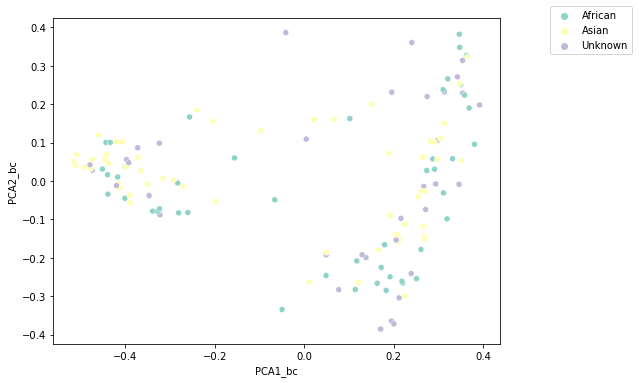

In [64]:
fig = plt.figure()
ax = plt.subplot(111)

sns.scatterplot(x = 'PCA1_bc',y = 'PCA2_bc', data = plotting_df, hue = 'Origin', palette = 'Set3')
ax.legend(bbox_to_anchor=(1.1, 1.05))
# plt.savefig('../Figures/ordination_group.jpg', bbox_inches = 'tight', dpi = 300)